In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt  
import h5py 
from PIL import Image 

In [81]:
#Loading the Dataset
#Code from another kernel
def load_dataset():
    train_dataset = h5py.File('../input/cat-images-dataset/train_catvnoncat.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) 
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) 

    test_dataset = h5py.File('../input/cat-images-dataset/test_catvnoncat.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) 
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) 

    classes = np.array(test_dataset["list_classes"][:]) 
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes
X_train_org, Y_train_org, X_test_org, Y_test_org, classes = load_dataset()


In [82]:
#Code Starts Here
X_train, Y_train, X_test, Y_test=X_train_org, Y_train_org, X_test_org, Y_test_org
for x in [X_train, Y_train, X_test, Y_test, classes]:
    print(x.shape)

(209, 64, 64, 3)
(1, 209)
(50, 64, 64, 3)
(1, 50)
(2,)


![](http://)We will reshape X_train and X_test to size (64x64x3,total number of samples)

In [83]:
X_train=X_train.reshape([X_train.shape[0],-1])
X_test=X_test.reshape([X_test.shape[0],-1])
X_train.shape

(209, 12288)

In [84]:
X_train=X_train/255
X_test=X_test/255

First Lets Use Well Implemented Function in SkLearn

In [85]:
from sklearn.linear_model import LogisticRegression

We will use n_jobs=-1 so to utilize every available cpu

In [86]:
model=LogisticRegression(n_jobs=-1)

In [87]:
model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [88]:
model.fit(X_train,Y_train.T)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [89]:
model.score(X_train,Y_train.T)

1.0

In [90]:
model.score(X_test,Y_test.T)

0.72

SO we Have a test accuracy of 72% which is pretty nice

Let Us try different learning rate


In [91]:
from sklearn.linear_model import SGDClassifier

In [92]:
?SGDClassifier

In [93]:
score=[]
lr=[0.001,0.003,0.01,0.03,0.1,0.3,0.9,1]

In [94]:
for l in lr:
    model=SGDClassifier(loss='log',n_jobs=-1,learning_rate='constant',eta0=l,random_state=2)
    model.fit(X_train,Y_train.T)
    score.append(model.score(X_test,Y_test.T))
    

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

In [95]:
import matplotlib.pyplot as plt

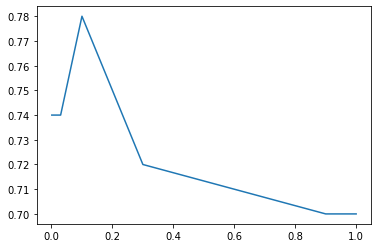

In [96]:
plt.plot(lr,score)

In [97]:
score

[0.74, 0.74, 0.74, 0.74, 0.78, 0.72, 0.7, 0.7]

In [98]:
def cat_or_no_cat(i):
    if i==1:
        print('cat')
    else:
        print('no cat')

In [108]:
def predict(X_org,model):
    X=X_org.reshape(1,-1)
    X=X/255
    Y_hat=model.predict(X)
    return Y_hat

Visually seeing ... Enter The interation number below

In [128]:
import random
?random.randint


cat
IT IS A  None
cat
According to model it IS A  None


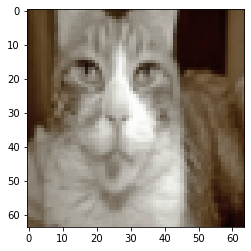

In [152]:
num=random.randint(0,X_test_org.shape[0]-1)
print("IT IS A ",cat_or_no_cat(Y_test_org[0,num]))
print("According to model it IS A " ,cat_or_no_cat(predict(X_test_org[num],model)))
plt.imshow(X_test_org[num])

In [145]:
acc=0
for i in range(100):
    num=random.randint(0,X_test_org.shape[0]-1)
    
    acc=acc+abs(Y_test_org[0,num]-predict(X_test_org[num],model))
print(acc/100)

[0.31]


array([86])